In [46]:
import pandas as pd
import ast

from numpy.ma.extras import unique

df = pd.read_csv('hospital_extraction.csv')
df['Contracting Authority'] = df['Contracting Authority'].apply(ast.literal_eval)
print(df['Contracting Authority'].apply(len).mean()) #Since there seem to be one CA per contract we get rid of the list
df['Contracting Authority'] = df['Contracting Authority'].apply(lambda x: x[0] if x else None)
df['Contract Year'] = df['Document ID'].apply(lambda x: int(x.split('-')[-1]))
# Function to flatten a nested dictionary
def flatten_dict(d, parent_key='', sep='_'):
    """
    Flattens a nested dictionary into a single level with concatenated keys.
    """
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

flat_ca = df["Contracting Authority"].apply(lambda x: flatten_dict(x) if x else {})
flat_ca_df = pd.DataFrame(flat_ca.tolist())  # Expand into new DataFrame columns

# Combine original DataFrame with flattened DataFrame
df = pd.concat([df, flat_ca_df], axis=1)
display(df)

1.0


,Document ID,Contracting Authority,Healthcare Authority Class,Healthcare CPV,Contract Year,Address_Territorial Unit (NUTS3),Address_Postal Code,Address_Address,Address_Town,Address_Country,National ID,Activity,CA Type,Name,Contact_Email,Contact_Phone,Contact_URL
0,00094853-2021,{'Address': {'Territorial Unit (NUTS3)': 'RO42...,Non-Healthcare Direct Procurer,True,2021,RO422,320210,Str. Făgărașului nr. 18,Reșita,RO,1061626,HEALTH,-,Spitalul Județean Reșita,compartimentachizitii@gmail.com,+40 255227830/106,www.spitaluljudeteanresita.ro
1,00094707-2021,{'Address': {'Territorial Unit (NUTS3)': 'HU23...,Non-Healthcare Direct Procurer,False,2021,HU231,7622,Vasvári Pál utca 4.,Pécs,HU,EKRSZ_89809802,-,-,Pécsi Tudományegyetem,onhausz.nikolett@pte.hu,+36 309147518,http://www.pte.hu
2,00095625-2021,{'Address': {'Territorial Unit (NUTS3)': 'FRF1...,Non-Healthcare Direct Procurer,False,2021,FRF11,67604,"9 place d'Armes, BP 40188",Sélestat Cedex,FR,-,GENERAL_PUBLIC_SERVICES,REGIONAL_AUTHORITY,Ville de Sélestat,marches.publics@ville-selestat.fr,+33 388588500,http://www.selestat.fr
3,00095656-2021,{'Address': {'Territorial Unit (NUTS3)': 'DEA3...,Non-Healthcare Direct Procurer,False,2021,DEA36,45657,Kurt-Schumacher-Allee 1,Recklinghausen,DE,-,GENERAL_PUBLIC_SERVICES,REGIONAL_AUTHORITY,"Kreis Recklinghausen, Der Landrat",vergabestelle@kreis-re.de,-,www.kreis-re.de
4,00094926-2021,"{'Address': {'Territorial Unit (NUTS3)': 'NL',...",Non-Healthcare Direct Procurer,False,2021,NL,3526 KV,Winthontlaan 2,Utrecht,NL,111590197,-,BODY_PUBLIC,Stichting Nederlandse Wetenschappelijk Onderzo...,sanders@its-projects.nl,+31 572362240,http://www.nwo-i.nl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354930,00267886-2018,{'Address': {'Territorial Unit (NUTS3)': 'FRL0...,Non-Healthcare Direct Procurer,False,2018,FRL04,13402,31 chemin Joseph Aiguier,Marseille Cedex 20,FR,180089013 01724,-,-,CNRS Délégation Provence et Corse,appel.offres@dr12.cnrs.fr,+33 491164014,http://www.provence-corse.cnrs.fr
1354931,00268760-2018,{'Address': {'Territorial Unit (NUTS3)': 'CZ01...,Non-Healthcare Direct Procurer,False,2018,CZ010,140 21,Vídeňská 1958/9,Praha 4,CZ,00023001,HEALTH,MINISTRY,Institut klinické a experimentální medicíny,pikm@ikem.cz,+420 261365056,http://www.ikem.cz
1354932,00267417-2018,{'Address': {'Territorial Unit (NUTS3)': 'DE14...,Non-Healthcare Direct Procurer,False,2018,DE142,72076,Schnarrenbergstraße 1,Tübingen,DE,-,ECONOMIC_AND_FINANCIAL_AFFAIRS,REGIONAL_AUTHORITY,"Land Baden-Württemberg, vertreten durch den La...",poststelle.amttue@vbv.bwl.de,+49 7071-29-79012,www.vba-tuebingen.de
1354933,00268921-2018,{'Address': {'Territorial Unit (NUTS3)': 'FRJ1...,Non-Healthcare Direct Procurer,False,2018,FRJ13,34027,"BP 2200, Esplanade Charles de Gaulle",Montpellier Cedex 1,FR,-,-,-,SAEML Montpellier Events,service-achats@montpellier-events.com,+33 467616756,http://www.montpellier-events.com


In [47]:
authorities = df[df['Healthcare CPV']].drop_duplicates(subset=["Address_Country", "National ID"]).reset_index(drop=True)[['Name', 'CA Type', 'Contact_URL', 'Healthcare CPV', 'Address_Country', 'Contract Year']]
display(authorities)

,Name,CA Type,Contact_URL,Healthcare CPV,Address_Country,Contract Year
0,Spitalul Județean Reșita,-,www.spitaluljudeteanresita.ro,True,RO,2021
1,VSIA “Bērnu klīniskā universitātes slimnīca”,-,http://www.bkus.lv,True,LV,2021
2,Comunidade Intermunicipal da Região de Coimbra,-,www.cim-regiaodecoimbra.pt,True,PT,2021
3,Spitalul Județean de Urgență „Mavromati” Botoșani,MINISTRY,www.spitjudbotosani.ro,True,RO,2021
4,Górnośląskie Centrum Medyczne im. prof. Leszka...,BODY_PUBLIC,www.bip.gcm.pl,True,PL,2021
...,...,...,...,...,...,...
7056,"Junta de Castilla y León, Consejería de Foment...",REGIONAL_AUTHORITY,http://www.contratacion.jcyl.es/,True,ES,2018
7057,Wojewódzki Szpital Specjalistyczny im. Najświę...,BODY_PUBLIC,www.szpitalparkitka.com.pl,True,PL,2018
7058,Fundación para la Investigación Biomédica del ...,REGIONAL_AGENCY,http://www.investigacionpuertadehierro.com,True,ES,2018
7059,"Aumed, a.s.",-,http://aumed.cz/,True,CZ,2018


In [48]:
sampled_df = authorities.groupby(['Contract Year', 'Address_Country']).apply(lambda x: x.sample(n=min(len(x), 1), replace = True), include_groups = False).reset_index(drop=True)
display(sampled_df)

,Name,CA Type,Contact_URL,Healthcare CPV
0,Steiermärkische Krankenanstaltengesellschaft m...,BODY_PUBLIC,http://www.kages.at,True
1,OCMW Balen,REGIONAL_AUTHORITY,www.balen.be,True
2,„МБАЛ — Ардино“ ЕООД,-,http://www.ardino.bg/,True
3,Poliklinika Prahy 7,-,https://www.saz7.cz/,True
4,"Mühlenkreiskliniken (AöR), Hans-Nolte-Straße 1...",BODY_PUBLIC,http://www.muehlenkreiskliniken.de,True
...,...,...,...,...
165,IPATIMUP - Instituto de Patologia e Imunologia...,-,www.ipatimup.pt,True
166,COMUNA MITOCU DRAGOMIRNEI (PRIMARIA COMUNEI MI...,REGIONAL_AUTHORITY,www.e-licitatie.ro,True
167,Åklagarmyndigheten,NATIONAL_AGENCY,http://www.aklagare.se,True
168,Institut »Jožef Stefan«,-,http://www.ijs.si,True


In [15]:
import pandas as pd
df = pd.read_csv('manual_hospitals.csv', delimiter=";", encoding="utf-8")
print(df['Class'].unique())
df.drop(columns=['Index'], inplace=True)
df["Class"] = df["Class"].apply(lambda x: x if x in ["Hospital", "University Hospital"] else "Other")
display(df)

['University Hospital' 'Social Welfare Center' 'Hospital' 'Government'
 'Insurance' 'Procurement' 'Other' 'University' 'Firefighter' 'Housing'
 'Research' 'Nursing Home' 'Prison' 'Rehab Center']


,Name,CA Type,Contact_URL,Class
0,Steiermärkische Krankenanstaltengesellschaft m...,BODY_PUBLIC,http://www.kages.at,University Hospital
1,OCMW Dendermonde,REGIONAL_AUTHORITY,http://www.dendermonde.be,Other
2,„МБАЛ „Д-р Иван Селимински“ — Сливен“ АД,BODY_PUBLIC,www.mbal.sliven.net,Hospital
3,"Nemos Sokolov, s.r.o.",-,http://www.nemosok.cz/,Hospital
4,Kreiskrankenhaus Demmin GmbH,-,www.kkh-demmin.de,Hospital
...,...,...,...,...
165,Município da Amadora,REGIONAL_AUTHORITY,www.cm-amadora.pt,Other
166,Spital Orasenesc Pucioasa,-,www.spitalpucioasa.ro,Hospital
167,Försäkringskassan,NATIONAL_AGENCY,https://www.forsakringskassan.se/,Other
168,MINISTRSTVO ZA FINANCE FINANČNA UPRAVA REPUBLI...,MINISTRY,http://www.fu.gov.si/,Other


Class
Other                  116
Hospital                44
University Hospital     10
Name: count, dtype: int64


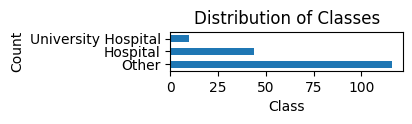

In [18]:
import capackage as ca

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from transformers import pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

class_counts = df['Class'].value_counts()
print(class_counts)
class_counts.plot(kind='barh', title='Distribution of Classes', figsize=(3, 0.5))
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [26]:
import capackage.classifiers as cls
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:



evaluation_df = pd.DataFrame(columns=['method', 'model', 'parameters' , 'labels', 'predictions'])
X_train, X_test, y_train, y_test = train_test_split(df['Name'], df['Class'], test_size=0.2, random_state=42)
# MANUAL RULE-BASED CLASSIFIER
predictions = cls.reg_exp_classifier_3(X_test)
result_mr = pd.DataFrame({
    'method': 'Expression Matching',
    'model': 'N/A',
    'labels': y_test.tolist(),
    'predictions': predictions,
    'parameters': 'N/A'
})
results_ar = []
for tokens in range(1, 20, 1):
    predictions = cls.reg_exp_classifier_auto_3(X_train, y_train, X_test, tokens)
    results_ar.append(pd.DataFrame({
        'method': 'Expression Matching',
        'model': 'N/A',
        'labels': y_test.tolist(),
        'predictions': predictions,
        'parameters': 'tokens=' + str(tokens)
    }))

evaluation_df = pd.concat([evaluation_df] + [result_mr] + results_ar, ignore_index=True)
display(evaluation_df)

Device set to use mps:0
Device set to use mps:0
Device set to use mps:0


,method,model,parameters,labels,predictions
0,Expression Matching,N/A,N/A,Other,Other
1,Expression Matching,N/A,N/A,Other,Other
2,Expression Matching,N/A,N/A,Hospital,Other
3,Expression Matching,N/A,N/A,Hospital,Other
4,Expression Matching,N/A,N/A,Hospital,Other
...,...,...,...,...,...
675,Expression Matching,N/A,tokens=19,Hospital,Other
676,Expression Matching,N/A,tokens=19,Other,University Hospital
677,Expression Matching,N/A,tokens=19,Other,University Hospital
678,Expression Matching,N/A,tokens=19,Other,University Hospital


In [30]:

zero_shot_models = [
        ("facebook/bart-large-mnli", "BART"),
        ("MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7", "multilingual DeBERTa"),
        ("distilbert-base-uncased", "DistilBERT"),
        ("roberta-large-mnli", "RoBERTa"),
        ("xlnet-large-cased", "XLNet")
]
results_0sb = []
results_0st = []
# Evaluate Zero-Shot Classifiers
for model_id, model_name in zero_shot_models:
    print('Loading ' + model_name)
    classifier = pipeline("zero-shot-classification", model=model_id)
    # BINARY BASED CLASSIFIER
    predictions = cls.zero_shot_classifier_binary_3(X_test, classifier)
    results_0sb.append(pd.DataFrame({
        'method': '0-Shot',
        'model': model_name,
        'labels': y_test.tolist(),
        'predictions': predictions,
        'parameters': 'N/A'
    })
    )
    # THRESHOLD BASED CLASSIFIER
    # print('Loading ' + model_name + ' with threshold')
    # scores = ca.zero_shot_classifier(X_test, classifier)
    # for t in np.arange(0, 1, 0.1):
    #     predictions = scores > t
    #     results_0st.append(pd.DataFrame({
    #         'method': '0-Shot',
    #         'model': model_name,
    #         'labels': y_test.tolist(),
    #         'predictions': predictions,
    #         'parameters': 'threshold=' + str(t)
    #     }))
evaluation_df = pd.concat([evaluation_df] + results_0sb + results_0st, ignore_index=True)
display(evaluation_df)

Loading BART


Device set to use mps:0
Classifying: 100%|██████████| 34/34 [00:08<00:00,  3.81it/s]


Loading multilingual DeBERTa


Device set to use mps:0
Classifying: 100%|██████████| 34/34 [00:15<00:00,  2.27it/s]


Loading DistilBERT


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use mps:0
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Classifying: 100%|██████████| 34/34 [00:01<00:00, 17.52it/s]


Loading RoBERTa


Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
Classifying: 100%|██████████| 34/34 [00:05<00:00,  6.33it/s]


Loading XLNet


Python(4105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-large-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use mps:0
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Classifying: 100%|██████████| 34/34 [00:08<00:00,  3.93it/s]


,method,model,parameters,labels,predictions
0,Expression Matching,N/A,N/A,Other,Other
1,Expression Matching,N/A,N/A,Other,Other
2,Expression Matching,N/A,N/A,Hospital,Other
3,Expression Matching,N/A,N/A,Hospital,Other
4,Expression Matching,N/A,N/A,Hospital,Other
...,...,...,...,...,...
845,0-Shot,XLNet,N/A,Hospital,Hospital
846,0-Shot,XLNet,N/A,Other,University Hospital
847,0-Shot,XLNet,N/A,Other,Hospital
848,0-Shot,XLNet,N/A,Other,Other


In [32]:
semantic_similarity_models = [
        ("paraphrase-MiniLM-L6-v2", "MiniLM"),
        ("sentence-transformers/all-MiniLM-L6-v2", "All MiniLM"),
        ("sentence-transformers/roberta-base-nli-stsb-mean-tokens", "RoBERTa"),
        ("sentence-transformers/xlm-r-bert-base-nli-stsb-mean-tokens", "XLM-R")
    ]

results_ssb = []
results_sst = []
# Evaluate Semantic Similarity Classifiers
for model_id, model_name in semantic_similarity_models:
    print('Loading ' + model_name)
    model = SentenceTransformer(model_id)

    # BINARY BASED CLASSIFIER
    predictions = cls.semantic_similarity_classifier_binary_3(X_test, model)
    results_ssb.append(pd.DataFrame({
        'method': 'Semantic Similarity',
        'model': model_name,
        'labels': y_test.tolist(),
        'predictions': predictions,
        'parameters': 'N/A'
    }))

    # THRESHOLD BASED CLASSIFIER
    # print('Loading ' + model_name + ' with threshold')
    # scores = ca.semantic_similarity_classifier(X_test, model)
    # for t in np.arange(0, 1, 0.1):
    #     predictions = scores > t
    #     results_sst.append(pd.DataFrame({
    #         'method': 'Semantic Similarity',
    #         'model': model_name,
    #         'labels': y_test.tolist(),
    #         'predictions': predictions,
    #         'parameters': 'threshold=' + str(t)
    #     }))
evaluation_df = pd.concat([evaluation_df] + results_ssb + results_sst, ignore_index=True)

Loading MiniLM


Classifying: 100%|██████████| 34/34 [00:03<00:00,  9.96it/s]


Loading All MiniLM


Classifying: 100%|██████████| 34/34 [00:00<00:00, 139.68it/s]


Loading RoBERTa


Classifying: 100%|██████████| 34/34 [00:11<00:00,  3.03it/s]


Loading XLM-R


Classifying: 100%|██████████| 34/34 [00:01<00:00, 21.54it/s]


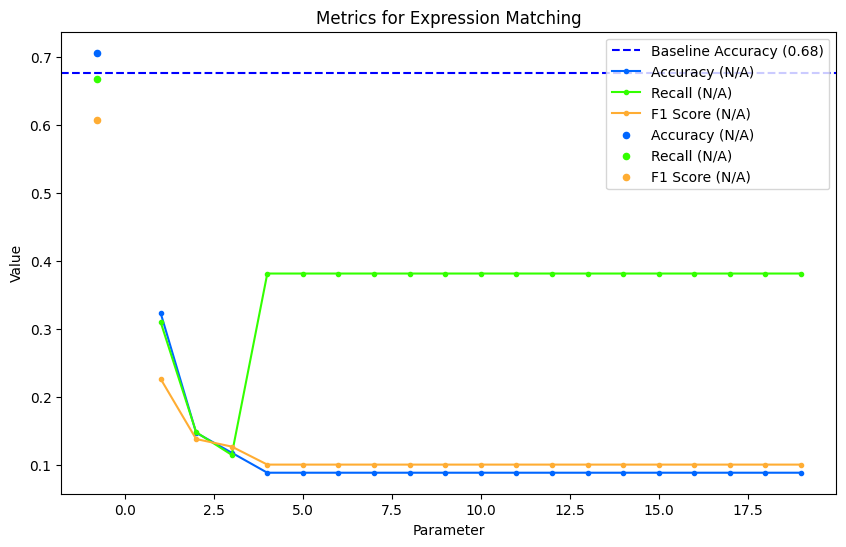

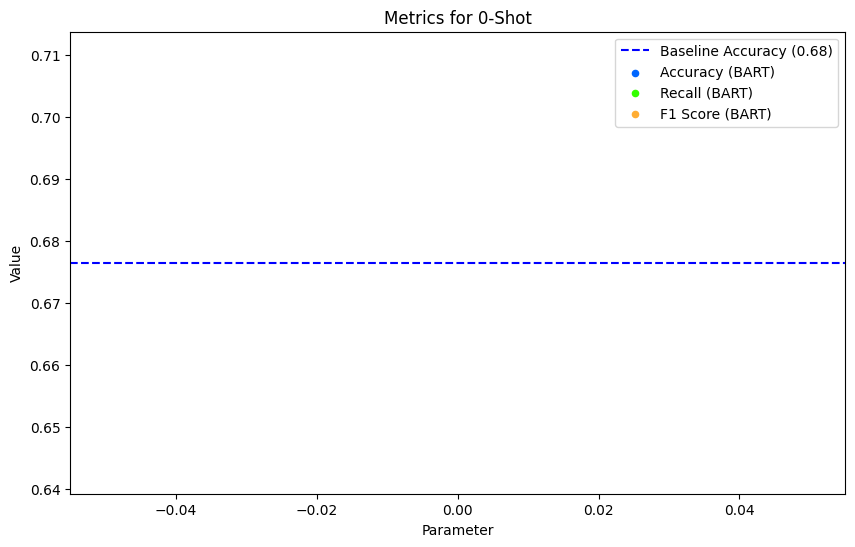

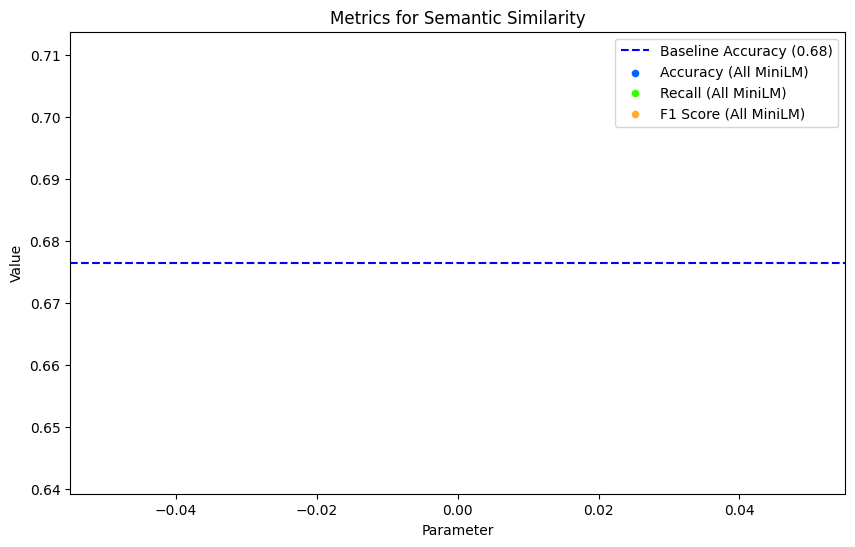

In [35]:
metric_df = ca.get_metrics((X_train, X_test, y_train, y_test), evaluation_df)
ca.get_analytics(metric_df)

In [38]:
display(evaluation_df[evaluation_df['method'] == 'Semantic Similarity'])
display(metric_df)

,method,model,parameters,labels,predictions
850,Semantic Similarity,MiniLM,N/A,Other,Other
851,Semantic Similarity,MiniLM,N/A,Other,Other
852,Semantic Similarity,MiniLM,N/A,Hospital,Other
853,Semantic Similarity,MiniLM,N/A,Hospital,University Hospital
854,Semantic Similarity,MiniLM,N/A,Hospital,Other
...,...,...,...,...,...
981,Semantic Similarity,XLM-R,N/A,Hospital,University Hospital
982,Semantic Similarity,XLM-R,N/A,Other,University Hospital
983,Semantic Similarity,XLM-R,N/A,Other,Hospital
984,Semantic Similarity,XLM-R,N/A,Other,University Hospital


,method,model,parameters,accuracy,recall,f1
0,Majority Class,N/A,N/A,0.676471,0.333333,0.269006
1,0-Shot,BART,N/A,0.441176,0.668116,0.509470
2,0-Shot,DistilBERT,N/A,0.382353,0.507246,0.234338
3,0-Shot,RoBERTa,N/A,0.676471,0.727536,0.548148
4,0-Shot,XLNet,N/A,0.323529,0.572464,0.294872
5,0-Shot,multilingual DeBERTa,N/A,0.588235,0.797101,0.611742
6,Expression Matching,N/A,N/A,0.705882,0.666667,0.607143
7,Expression Matching,N/A,tokens=1,0.323529,0.310145,0.226455
8,Expression Matching,N/A,tokens=10,0.088235,0.381159,0.100171
9,Expression Matching,N/A,tokens=11,0.088235,0.381159,0.100171
